# Simple Data
In this example, it is intended to show how a simple data can be plotted using the principles of Cairo, improving various aspects of the plot.

## 1 Region and Domain
Ann Arbor, Michigan, United States
Religious or traditions

## 2 Research Question

How have the number of followers of the main branches of religion varied in relation to the population the last 30 years?

## 3 Links

Ann Arbor 2010 report: 
http://www.thearda.com/rcms2010/rcms2010a.asp?U=11460&T=metro&S=Name&Y=2010

Ann Arbor 2000 report: 
http://www.thearda.com/rcms2010/rcms2010a.asp?U=11460&T=metro&S=Name&Y=2000

Ann Arbor 1990 report: 
http://www.thearda.com/rcms2010/rcms2010a.asp?U=11460&T=metro&S=Name&Y=1990

Ann Arbor 1980 report: 
http://www.thearda.com/rcms2010/rcms2010a.asp?U=11460&T=metro&S=Name&Y=1980


## 4 Image
<img src="assignment 4.png">

## 5 Discussion
This visualization was concerned with answering the question of How the number of followers of the main branches of religion varied in relation to the population in the last 30 years. 'thearda.com' was scraped for data concerning the region Ann Arbor and the last 30 years of data. Any new tradition of news religion bodies was dropped from the analysis in order to provide a more level comparison between the traditions. A ratio between the sum of the Adherents grouped by the traditions and the population was plotted to help the reader identify any major trends in the adherents ratio.

The plot indicates that, in general, all religions have a decrease in relation to the size of the population. Except for 'other' where the new religions are classified showing an increased rate. More information should be taken into account to draw conclusions, since Ann Arbor is a university city, with 33% of its employment in education services.

## 6 Cairo's principles
### Truthfulness

Because the population grows, it is logical that adherents of religions grow. But, in reality, they do not grow at the same speed as the population, this is why the ratio is shown.
### Beauty

the plot was created thinking about simplicity, small details like removing the frame of the labels and the type of line '-o' were taken into account.
### Functionality

to give it more functionality the color style 'seaborn-colorblind' was used
### Insightfulness

I think that seeing the different religious traditions plotted in ratios with respect to the population gives us that feeling of eureka, seeing that in general religions lose adherents in relation to the size of the population, and as new religions 'other' begin to grow to generate pluralism religious and cultural.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
#loading dataset
ann2010= pd.read_excel('arda-AnnArbor-1980-2010.xls'
                       ,sheet_name = '2010'
                       ,nrows = 74
                       ,usecols=[1, 4]
                       ,na_values='---')
ann2000= pd.read_excel('arda-AnnArbor-1980-2010.xls'
                       ,sheet_name = '2000'
                       ,nrows = 52
                       ,usecols=[1, 4]
                       ,na_values='---')
ann1990= pd.read_excel('arda-AnnArbor-1980-2010.xls'
                       ,sheet_name = '1990'
                       ,nrows = 51
                       ,usecols=[1, 4]
                       ,na_values='---')
ann1980= pd.read_excel('arda-AnnArbor-1980-2010.xls'
                       ,sheet_name = '1980'
                       ,nrows = 50
                       ,usecols=[1, 4]
                       ,na_values='---')
#populations sense 
popul = {'2010':344791
        ,'2000':322895
        ,'1990':282937
        ,'1980':264748}



#filter datasets
ann2010 = ann2010.sort_values(by=['Tradition']).groupby('Tradition').sum()
ann2010.rename(columns={'Adherents':'2010'}, inplace = True)
ann2000 = ann2000.sort_values(by=['Tradition']).groupby('Tradition').sum()
ann2000.rename(columns={'Adherents':'2000'}, inplace = True)
ann1990 = ann1990.sort_values(by=['Tradition']).groupby('Tradition').sum()
ann1990.rename(columns={'Adherents':'1990'}, inplace = True)
ann1980 = ann1980.sort_values(by=['Tradition']).groupby('Tradition').sum()
ann1980.rename(columns={'Adherents':'1980'}, inplace = True)


#ratio
ann2010 = ann2010 / popul['2010'] 
ann2000 = ann2000 / popul['2000'] 
ann1990 = ann1990 / popul['1990'] 
ann1980 = ann1980 / popul['1980'] 

#join
ann = pd.merge(ann2000, ann2010, how='outer', left_index=True, right_index=True)
ann = pd.merge(ann1990, ann, how='outer', left_index=True, right_index=True)
ann = pd.merge(ann1980, ann, how='outer', left_index=True, right_index=True)


ann = ann.drop(['Black Protestant'], axis=0)
ann = ann.T
ann

Tradition,Catholic,Evangelical Protestant,Mainline Protestant,Orthodox,Other
1980,0.142634,0.059589,0.134260,0.000000,0.008552
1990,0.121497,0.108303,0.116503,0.000000,0.022033
2000,0.129299,0.064349,0.091664,0.003363,0.045492
2010,0.123562,0.073491,0.075048,0.002662,0.037953


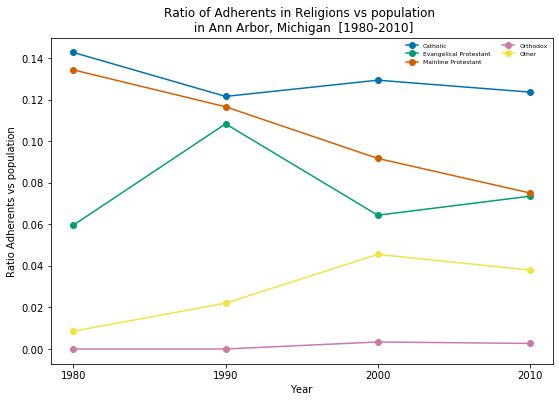

In [3]:

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

plt.subplots(figsize=(9, 6))
plt.plot(ann, '-o')
plt.xlabel('Year')
plt.ylabel('Ratio Adherents vs population')
plt.title('Ratio of Adherents in Religions vs population \n in Ann Arbor, Michigan  [1980-2010]')
plt.legend(['Catholic', 'Evangelical Protestant', 'Mainline Protestant', 'Orthodox', 'Other']
           , loc = 0, ncol = 2, fontsize=6, frameon = False)

